Exercise 4 - Duality
===
> Swiss Joint Master of Science in Computer Science - Applied Optimization

> Vincent Carrel, Jonas Fontana, Alain Schaller


In [101]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from sympy import solve
from sympy.abc import x, y

from helpers import center_axis, center_right_axis

plt.rcParams["figure.figsize"] = (8,8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Lagrange Duality (3 pts)
Consider the optimization problem

\begin{align}
\text{minimize } \quad & x^2 + 1 \\
\text{subject to } \quad & (x-2)(x-4) \le 0
\end{align}

with variable $x \in \mathbb{R}$.


**(a)** Analysis of primal problem: give the feasible set, the optimal value, and the optimal
solution.

**(b)** Lagrangian and dual function: plot the objective $x^2 + 1$ versus $x$. On the same plot,
show the feasible set, optimal point and value,
and plot the Lagrangian $L(x,\lambda)$ versus $x$ for a few positive values of $\lambda$.
Verify the lower bound property $(p^* \ge inf_xL(x,\lambda)$ for $\lambda \ge 0$). Compute and
sketch the Lagrange dual function $g$.


**(c)** Lagrange dual problem: state the dual problem, and verify that it is a concave maximization problem.
Find the dual optimal value and dual optimal solution $\lambda$. Does strong duality hold?




## (a)

### Feasible set

With subject to inequality $x=[2, 4]$

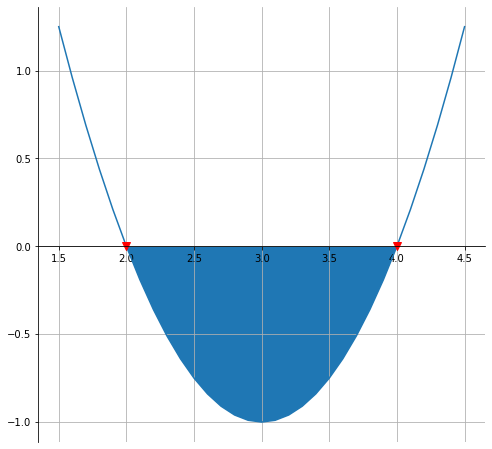

In [102]:
roots = solve((x-2)*(x-4))
root_low, root_high = roots

def ineq(X):
    return (X-2)*(X-4)

ineq_X = np.linspace(int(root_low) - 0.5, int(root_high) + 0.5, 31)
ineq_Y = ineq(ineq_X)

fig, ax = plt.subplots()
ax.plot(ineq_X, ineq_Y,
        roots, [0, 0], 'rv', markersize=8)
ax.fill_between(ineq_X, 0, ineq_Y, where=(ineq_Y <= 0))
center_axis(ax, left_spine=False)

### Optimal value

$y = 5$

_TODO add any comment? What? I followed the plot to see which x^* to choose and evaluate the function (trivial)_


### Optimal solution

$x = 2$


## (b)

### Plot the objective function with feasible set, optimal point and value

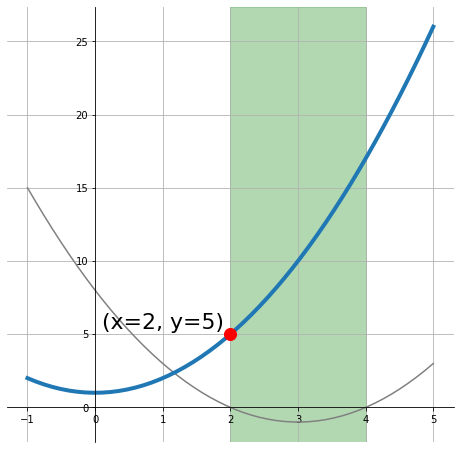

In [103]:
def objective_function(X):
    return X ** 2 + 1

X = np.linspace(-1, 5)
ineq_Y = ineq(X)

Y = objective_function(X)

x_opti = 2
y_opti = objective_function(x_opti)

fig, ax = plt.subplots()
ax.axvspan(root_low, root_high, color="green", alpha=0.3)
ax.plot(X, ineq_Y, 'gray')
ax.plot(X, Y,
        x_opti, y_opti, 'ro', markersize=12, linewidth=4)
ax.text(x_opti - 0.1, y_opti + 0.35, f"(x={x_opti}, y={y_opti})", size=22, ha="right")
center_axis(ax)


### Plot the Lagrangian function with a few positive values of $\lambda$
### Verify the lower bound property
### Compute and sketch the Lagrange dual function $g$

## (c)

### State the dual problem
### Verify concave maximization problem
### Find the dual optimal value and optimal solution $\lambda$
### Does strong duality hold?












\pagebreak

# KKT Condition (2 pts)
Consider the following optimization problem:

\begin{align}
\text{minimize } \quad & x_1^2 - 2x_2^2 \\
\text{subject to } \quad & (x_1+4)^2 - 2 \le x_2 \\
                         & x_1 - x_2 + 4 = 0 \\
                         & x_1 \ge -10
\end{align}

**(1)** sketch the problem and graphically determine the primal solution $x^*$.

**(2)** verify your $x^*$ by determining suitable $\lambda^*$ and $v^*$ such that the KKT conditions are
satisfied for $(x^*,\lambda^*,v^*)$.




## (1) Sketch the problem and determine $x^*$

1. Expand 1st inequality: $\Rightarrow (x_1+4)^2 - x_2 \le 2$
2. Rewrite 2nd constraint: $\Rightarrow x_1+4=x_2$
3. Plug 2nd constraint in 1st inequality: $\Rightarrow (x_1+4)^2 - (x_1+4) \le 2$
4. Expand/simplify $\Rightarrow x_1^2 + 8x_1+ 16 - x_1 -4 \le 2 \Leftrightarrow x_1^2 + 7x_1 + 10 \le 0$


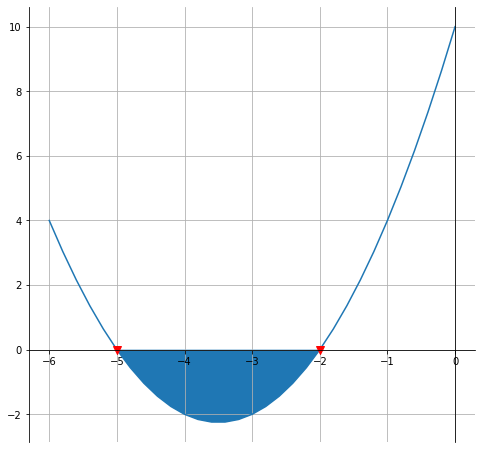

In [104]:

roots = solve(x ** 2 + 7 * x + 10)
root_low, root_high = roots

def ineq1(X):
    return X ** 2 + 7 * X + 10

ineq1_X = np.linspace(int(root_low) - 1, max(int(root_high) + 1, 0), 31)
ineq1_Y = ineq1(ineq1_X)


fig, ax = plt.subplots()
ax.plot(ineq1_X, ineq1_Y,
        roots, [0, 0], 'rv', markersize=8)
ax.fill_between(ineq1_X, 0, ineq1_Y, where=(ineq1_Y <= 0))
center_right_axis(ax)


$\Rightarrow$ with inequality 1, $x_1$ must be equal to $[-5, -2]$, which respect and is more strict
than the last inequality $x_1 \ge -10$.

$\Rightarrow$ using the second constraint, $x_2$ must be equal to $[-1, 2]$.


In [ ]:
def objective_function(X, Y):
    return X**2 - 2 * Y ** 2

X = np.linspace(-5, -2, 31)
Y = np.linspace(-1, 2, 31)

X, Y = np.meshgrid(X, Y)
Z = objective_function(X, Y)

ax = plt.axes(projection='3d', xlabel="x$_1$ = [-5, -2]", ylabel="$x_2$ = [-1, 2]")
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

In [ ]:
min_x1 = -2
min_x2 = np.array([-1, 2])
z = objective_function(min_x1, min_x2)

min_index = int(z.argmin())
# print(f"(x={min_x1}, y={min_x2[min_index]}, z={min(z)})")

from IPython.display import Math
Math("$\\boldsymbol{{x^* = \\binom{{{}}}{{{}}}}} \\quad z = {}$".format(min_x1, min_x2[min_index], min(z)))





## (2) Verify $x^*$ by determining suitable $\lambda^*$ and $v^*$ _st._ KKT conditions are satisfied